In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

/Users/bigd/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [145]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source= 'yahoo', start='2010-1-1')['Adj Close']

In [146]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-05-05,116.010002,2868.439941
2020-05-06,113.099998,2848.419922
2020-05-07,112.169998,2881.189941
2020-05-08,115.949997,2929.800049
2020-05-11,115.260002,2936.149902


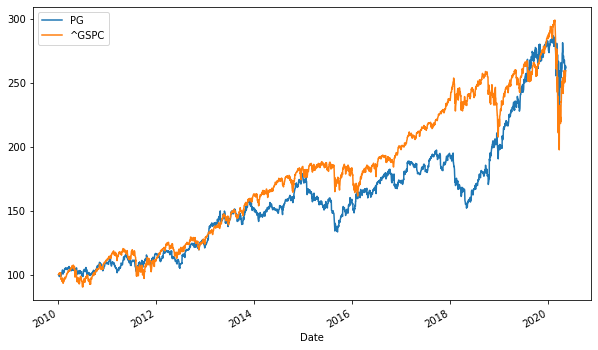

In [147]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,6))

In [148]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [149]:
log_returns.mean() * 250 

PG       0.092290
^GSPC    0.091386
dtype: float64

In [150]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029430,0.017799
^GSPC,0.017799,0.030193


In [151]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.597102
^GSPC,0.597102,1.000000


In [152]:
num_assets = len(assets)

In [153]:
num_assets

2

In [154]:
arr =np.random.random(2)
arr

array([0.95467309, 0.13047724])

In [155]:
arr[0] + arr[1]

1.085150327479543

In [156]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.66102215, 0.33897785])

In [157]:
weights[0] + weights[1]

0.9999999999999999

In [158]:
np.sum(weights * log_returns.mean()) * 250

0.09198370027340559

In [159]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02430525657274522

In [160]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.15590143223442568

In [161]:
pfolio_returns =[]
pfolio_volatilities =[]

for x in range (1000):
    weights = np.random.random(num_assets)
    weights/= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250,weights))))
    
pfolio_returns, pfolio_volatilities 

([0.09140445535729468,
  0.09180002743098606,
  0.0919658278284798,
  0.09175502673606689,
  0.09185832042234367,
  0.09158800063493273,
  0.0916053435045684,
  0.09158204525889739,
  0.09168686148673262,
  0.0915477961619195,
  0.09210024524835475,
  0.0921632359717958,
  0.09203609575689882,
  0.09184999407296868,
  0.09220186677337913,
  0.09157261606043982,
  0.09176236664190378,
  0.09223248424799323,
  0.09181155825681867,
  0.09140796978702109,
  0.09187994241068234,
  0.09222675255025167,
  0.09188689681597216,
  0.09197446117306053,
  0.09210097154957882,
  0.091684082458354,
  0.09208337525659552,
  0.09217484523699057,
  0.09179690798345207,
  0.09198943292379326,
  0.09183723342869389,
  0.0920657670465798,
  0.09152903022688978,
  0.09170120368680708,
  0.09145403110787668,
  0.09192236648687732,
  0.09188881632264138,
  0.09193623918119784,
  0.09152374259840053,
  0.09172939287779532,
  0.09182640491463614,
  0.09180157103806717,
  0.09227553420154255,
  0.09222280909611

In [162]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities
#BEST To turn it into an array for better grouping.

(array([0.09226402, 0.09185705, 0.09202243, 0.09173938, 0.09161303,
        0.09202941, 0.09161366, 0.09208864, 0.09204425, 0.09182018,
        0.09174745, 0.09201806, 0.09170344, 0.09194827, 0.09160608,
        0.09163618, 0.09193931, 0.09166354, 0.09185958, 0.0915889 ,
        0.09188865, 0.09186166, 0.09201452, 0.09141846, 0.09174687,
        0.0918829 , 0.09209173, 0.09158587, 0.09154856, 0.09176743,
        0.09215293, 0.09208189, 0.09174755, 0.0918619 , 0.09224112,
        0.09196135, 0.09219107, 0.09180123, 0.09167041, 0.09214624,
        0.09186385, 0.09161904, 0.09142853, 0.09183146, 0.09143323,
        0.09166555, 0.0917116 , 0.09199944, 0.09196605, 0.09165341,
        0.0920013 , 0.09198136, 0.09165065, 0.09189095, 0.09219621,
        0.09193659, 0.09165124, 0.09188032, 0.0918567 , 0.09155014,
        0.091393  , 0.09179817, 0.0913985 , 0.09150456, 0.09212615,
        0.09170116, 0.09172465, 0.09148669, 0.09205666, 0.09180167,
        0.09208628, 0.09174196, 0.09162094, 0.09

In [163]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility' : pfolio_volatilities})

In [164]:
portfolios.head()
#printing out the top product of return to volatility rate

,Return,Volatility
0,0.092264,0.169626
1,0.091857,0.154272
2,0.092022,0.156996
3,0.091739,0.155481
4,0.091613,0.159629


In [165]:
portfolios.tail()

,Return,Volatility
995,0.091928,0.154810
996,0.091972,0.155630
997,0.091715,0.156052
998,0.091516,0.164695
999,0.091588,0.160775


Text(0, 0.5, 'Expected Return')

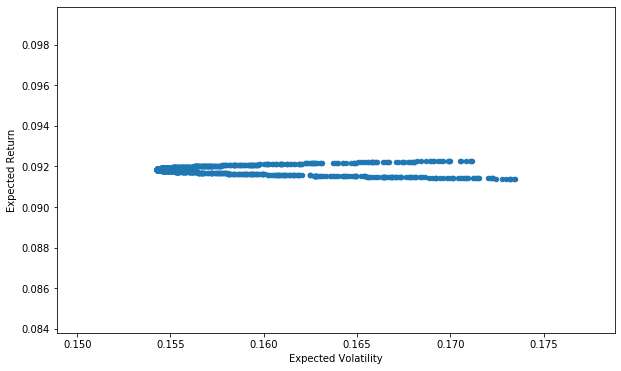

In [166]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')